# EDA

## Preguntas y conocimiento de data

### Pasos previos
* Cuantas columnas se manejan?
* Eliminar columnas inutiles
* nos hacemos preguntas para tratar de entender la data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52894 entries, 0 to 52893
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 52894 non-null  object 
 1   rank                  52894 non-null  int64  
 2   critic_meta_score     52689 non-null  float64
 3   review_content        52867 non-null  object 
 4   review_source         52689 non-null  object 
 5   author                52689 non-null  object 
 6   review_date           42938 non-null  object 
 7   summary               52894 non-null  object 
 8   meta_score            52894 non-null  int64  
 9   user_score            52894 non-null  object 
 10  release_date          52894 non-null  object 
 11  link                  52894 non-null  object 
 12  critics_reviews_link  52894 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 5.2+ MB


In [4]:
df.head()

,title,rank,critic_meta_score,review_content,review_source,author,review_date,summary,meta_score,user_score,release_date,link,critics_reviews_link
0,Rectify: Season 4,1,100.0,It allows us to know and care for these charac...,Collider,Allison Keene,"Oct 27, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...
1,Rectify: Season 4,1,100.0,"Rectify, a drama entering its final season on ...",The New York Times,James Poniewozik,"Oct 25, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...
2,Rectify: Season 4,1,100.0,No other series so poignantly probes the human...,Salon,Melanie McFarland,"Oct 26, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...
3,Rectify: Season 4,1,100.0,None of these characters is particularly happy...,Yahoo TV,Ken Tucker,"Oct 26, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...
4,Rectify: Season 4,1,100.0,Rectify is the best series I have ever seen on...,The Daily Beast,Malcolm Jones,"Oct 26, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,"October 26, 2016",https://www.metacritic.com/tv/rectify/season-4,https://www.metacritic.com/tv/rectify/season-4...


In [5]:
# basic statistics for numeric fields
df.describe()

,rank,critic_meta_score,meta_score
count,52894.000000,52689.000000,52894.000000
mean,1554.318675,65.396136,65.273774
std,899.315208,21.106417,14.809666
min,1.000000,0.000000,13.000000
25%,790.000000,50.000000,56.000000
50%,1551.500000,70.000000,66.000000
75%,2319.000000,80.000000,76.000000
max,3139.000000,100.000000,99.000000


### eliminar columnas poco relevantes

In [6]:
df.drop('summary',inplace=True, axis=1)
df.drop('link',inplace=True, axis=1)
df.drop('critics_reviews_link',inplace=True, axis=1)

In [7]:
df['user_score'] = df['user_score'].replace('',np.nan).replace('tbd',np.nan).astype(float)
df['user_score'] = df['user_score']*10



In [8]:
df['release_date'] = pd.to_datetime(df['release_date'],format='%B %d, %Y', errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52894 entries, 0 to 52893
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              52894 non-null  object        
 1   rank               52894 non-null  int64         
 2   critic_meta_score  52689 non-null  float64       
 3   review_content     52867 non-null  object        
 4   review_source      52689 non-null  object        
 5   author             52689 non-null  object        
 6   review_date        42938 non-null  object        
 7   meta_score         52894 non-null  int64         
 8   user_score         49370 non-null  float64       
 9   release_date       52887 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [10]:
df.describe()

,rank,critic_meta_score,meta_score,user_score
count,52894.000000,52689.000000,52894.000000,49370.000000
mean,1554.318675,65.396136,65.273774,68.949544
std,899.315208,21.106417,14.809666,15.068393
min,1.000000,0.000000,13.000000,1.000000
25%,790.000000,50.000000,56.000000,61.000000
50%,1551.500000,70.000000,66.000000,72.000000
75%,2319.000000,80.000000,76.000000,80.000000
max,3139.000000,100.000000,99.000000,97.000000


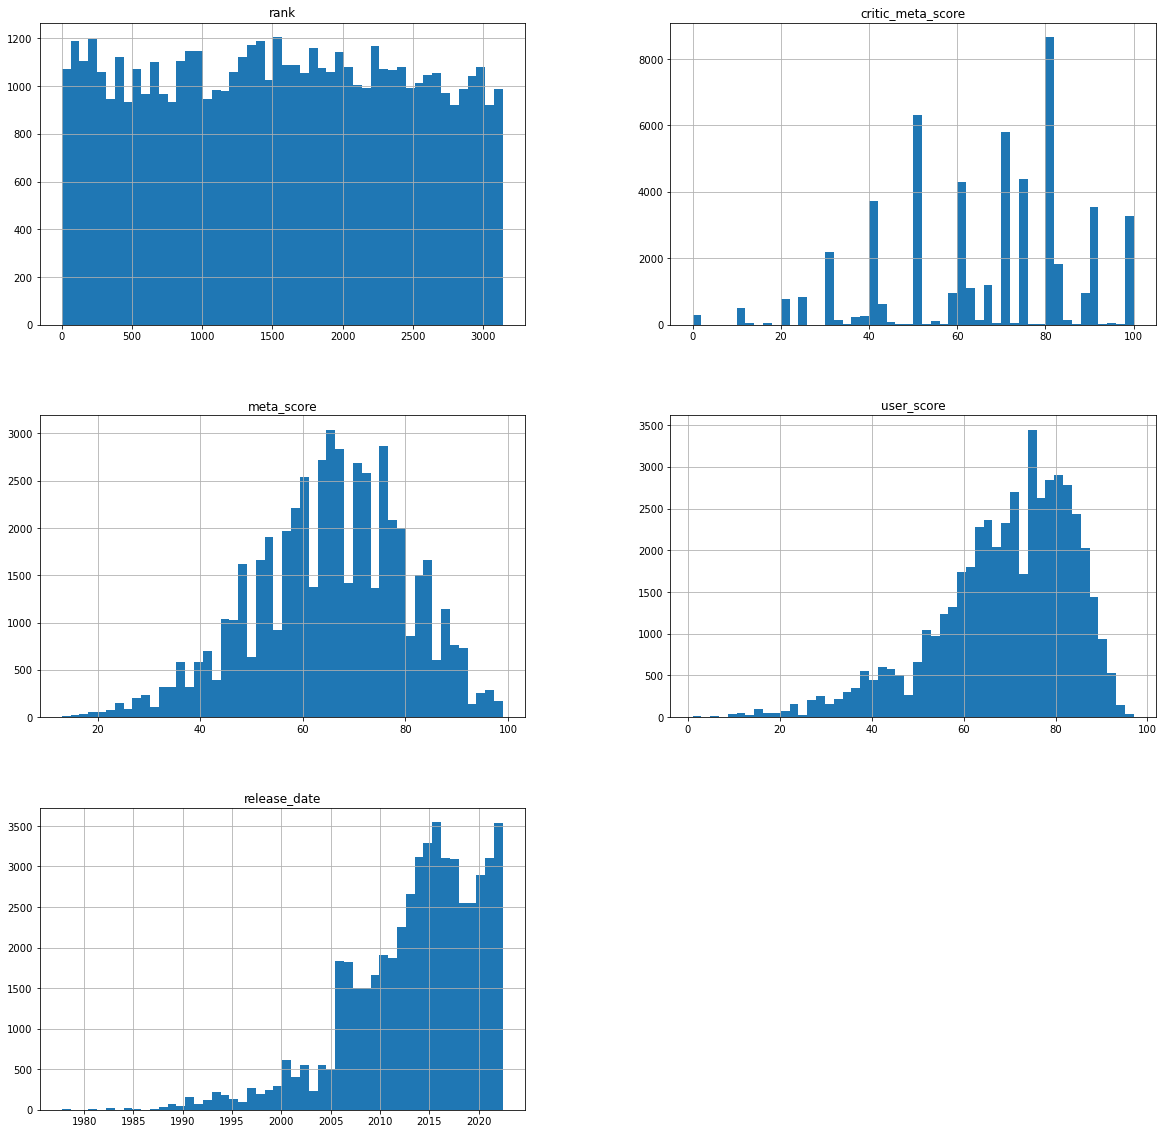

In [11]:
df.hist(bins=50, figsize=(20,20))
plt.show()

## ¿Cuantas fuentes de reseñas hay?

In [12]:
df.review_source.unique()

array(['Collider', 'The New York Times', 'Salon', 'Yahoo TV',
       'The Daily Beast', 'Vox.com', 'Hitfix', 'IndieWire',
       'Slant Magazine', 'Boston Herald', 'TV Guide Magazine',
       'Chicago Tribune', 'Philadelphia Inquirer', 'USA Today',
       'Baltimore Sun', 'Entertainment Weekly', 'New York Daily News',
       'Chicago Sun-Times', 'Los Angeles Times', 'Orlando Sentinel',
       'Newsday', nan, 'Houston Chronicle', 'Variety', 'Boston Globe',
       'San Diego Union-Tribune', 'People Weekly',
       'Philadelphia Daily News', 'Dallas Morning News',
       'Cleveland Plain Dealer', 'Pittsburgh Post-Gazette',
       'San Jose Mercury News/Contra Costa Times',
       'St. Louis Post-Dispatch', 'Kansas City Star', 'Washington Post',
       'Newark Star-Ledger', 'The New Yorker', 'The Huffington Post',
       'The Hollywood Reporter', 'San Francisco Chronicle', 'Uncle Barky',
       'New York Post', 'Denver Post', 'Time', 'Newsweek',
       'Arizona Republic', 'Detroit Free Pre

In [13]:
df.review_source.nunique()

101

In [14]:
df.groupby(['review_source'])["critic_meta_score","meta_score","user_score"].describe()

C:\Users\luis_\AppData\Local\Temp/ipykernel_7408/3913747555.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['review_source'])["critic_meta_score","meta_score","user_score"].describe()


critic_meta_score                                     \
                                    count       mean        std   min    25%   
review_source                                                                  
ABC News                             28.0  78.642857  17.023327  30.0  73.75   
Arizona Republic                     80.0  70.750000  22.545313  10.0  60.00   
Baltimore Sun                       216.0  66.398148  24.110382   0.0  50.00   
Boston Globe                       1486.0  62.376851  21.886499   0.0  50.00   
Boston Herald                       989.0  64.656218  17.621215   0.0  50.00   
...                                   ...        ...        ...   ...    ...   
Washington Post                    1477.0  58.061611  25.260612   0.0  40.00   
We Got This Covered                 262.0  68.015267  19.551282  20.0  52.50   
Yahoo TV                            468.0  64.380342  20.988439   0.0  50.00   
Zap2it (Inside the Box)             181.0  63.922652  19.764575   0.0  50.00   
i                                   121.0  71.404959  16.088598  20.0  60.00   

                                           meta_score             ...        \
                          50%   75%    max      count       mean  ...   75%   
review_source                                                     ...         
ABC News                 88.0  88.5  100.0       28.0  72.000000  ...  81.0   
Arizona Republic         75.0  90.0  100.0       80.0  68.625000  ...  81.0   
Baltimore Sun            70.0  80.0  100.0      216.0  66.856481  ...  78.0   
Boston Globe             70.0  80.0  100.0     1486.0  63.810902  ...  75.0   
Boston Herald            67.0  75.0  100.0      989.0  63.422649  ...  74.0   
...                       ...   ...    ...        ...        ...  ...   ...   
Washington Post          60.0  80.0  100.0     1477.0  64.007448  ...  75.0   
We Got This Covered      70.0  80.0  100.0      262.0  67.309160  ...  78.0   
Yahoo TV                 70.0  80.0  100.0      468.0  67.608974  ...  78.0   
Zap2it (Inside the Box)  70.0  80.0  100.0      181.0  60.232044  ...  71.0   
i                        80.0  80.0  100.0      121.0  69.016529  ...  77.0   

                              user_score                                    \
                          max      count       mean        std   min   25%   
review_source                                                                
ABC News                 92.0       26.0  68.769231  12.303846  40.0  60.0   
Arizona Republic         98.0       65.0  82.461538   8.013810  54.0  80.0   
Baltimore Sun            99.0      169.0  77.615385  13.853399  13.0  74.0   
Boston Globe             99.0     1375.0  70.357818  14.491978   9.0  62.5   
Boston Herald            99.0      933.0  67.632369  15.331561   9.0  60.0   
...                       ...        ...        ...        ...   ...   ...   
Washington Post          99.0     1349.0  69.045219  15.632658   9.0  61.0   
We Got This Covered      96.0      260.0  69.084615  13.328365  24.0  61.0   
Yahoo TV                 99.0      467.0  68.188437  14.444315   9.0  61.0   
Zap2it (Inside the Box)  92.0      179.0  69.318436  14.338768   9.0  63.0   
i                        96.0      101.0  63.108911  16.071030   1.0  56.0   

                                            
                          50%    75%   max  
review_source                               
ABC News                 68.5  78.25  91.0  
Arizona Republic         84.0  88.00  94.0  
Baltimore Sun            81.0  86.00  94.0  
Boston Globe             73.0  81.00  96.0  
Boston Herald            71.0  79.00  96.0  
...                       ...    ...   ...  
Washington Post          73.0  81.00  95.0  
We Got This Covered      71.0  79.00  94.0  
Yahoo TV                 71.0  79.00  92.0  
Zap2it (Inside the Box)  73.0  79.00  93.0  
i                        66.0  73.00  91.0  

[101 rows x 24 columns]

In [15]:
df.groupby(['release_date']).describe()

rank                                                            \
             count         mean          std     min     25%     50%     75%   
release_date                                                                   
1977-09-24     9.0  2878.000000     0.000000  2878.0  2878.0  2878.0  2878.0   
1981-02-01    11.0   542.000000     0.000000   542.0   542.0   542.0   542.0   
1982-09-22    17.0  1441.000000     0.000000  1441.0  1441.0  1441.0  1441.0   
1984-09-30    20.0  1169.000000     0.000000  1169.0  1169.0  1169.0  1169.0   
1985-09-20     7.0  2477.000000     0.000000  2477.0  2477.0  2477.0  2477.0   
...            ...          ...          ...     ...     ...     ...     ...   
2022-06-08    23.0   625.000000     0.000000   625.0   625.0   625.0   625.0   
2022-06-09     7.0  1377.000000     0.000000  1377.0  1377.0  1377.0  1377.0   
2022-06-10    30.0   827.633333  1072.576835   232.0   232.0   264.0   264.0   
2022-06-12    24.0   760.000000   368.380710   505.0   505.0   505.0  1270.0   
2022-06-16     9.0  1083.000000     0.000000  1083.0  1083.0  1083.0  1083.0   

                     critic_meta_score             ... meta_score        \
                 max             count       mean  ...        75%   max   
release_date                                       ...                    
1977-09-24    2878.0               9.0  43.555556  ...       43.0  43.0   
1981-02-01     542.0              11.0  79.090909  ...       79.0  79.0   
1982-09-22    1441.0              17.0  68.235294  ...       68.0  68.0   
1984-09-30    1169.0              20.0  70.100000  ...       71.0  71.0   
1985-09-20    2477.0               6.0  53.333333  ...       53.0  53.0   
...              ...               ...        ...  ...        ...   ...   
2022-06-08     625.0              23.0  77.521739  ...       78.0  78.0   
2022-06-09    1377.0               7.0  68.000000  ...       68.0  68.0   
2022-06-10    2739.0              30.0  76.900000  ...       85.0  85.0   
2022-06-12    1270.0              24.0  77.125000  ...       80.0  80.0   
2022-06-16    1083.0               9.0  71.888889  ...       72.0  72.0   

             user_score                                           
                  count  mean  std   min   25%   50%   75%   max  
release_date                                                      
1977-09-24          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  
1981-02-01         11.0  66.0  0.0  66.0  66.0  66.0  66.0  66.0  
1982-09-22          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  
1984-09-30         20.0  85.0  0.0  85.0  85.0  85.0  85.0  85.0  
1985-09-20          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  
...                 ...   ...  ...   ...   ...   ...   ...   ...  
2022-06-08         23.0  46.0  0.0  46.0  46.0  46.0  46.0  46.0  
2022-06-09          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  
2022-06-10         10.0  78.0  0.0  78.0  78.0  78.0  78.0  78.0  
2022-06-12          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  
2022-06-16          0.0   NaN  NaN   NaN   NaN   NaN   NaN   NaN  

[2299 rows x 32 columns]

In [64]:
df.release_date.dt.year


0        2016.0
1        2016.0
2        2016.0
3        2016.0
4        2016.0
          ...  
52889    2007.0
52890    2007.0
52891    2007.0
52892    2007.0
52893    2007.0
Name: release_date, Length: 52894, dtype: float64

In [16]:
df.groupby(lambda x: df['release_date'][x].year).describe()

rank                                                            \
         count         mean          std     min     25%     50%     75%   
1977.0     9.0  2878.000000     0.000000  2878.0  2878.0  2878.0  2878.0   
1981.0    11.0   542.000000     0.000000   542.0   542.0   542.0   542.0   
1982.0    17.0  1441.000000     0.000000  1441.0  1441.0  1441.0  1441.0   
1984.0    20.0  1169.000000     0.000000  1169.0  1169.0  1169.0  1169.0   
1985.0     7.0  2477.000000     0.000000  2477.0  2477.0  2477.0  2477.0   
1986.0    14.0  1599.000000  1316.903536   330.0   330.0  1599.0  2868.0   
1987.0    22.0  2660.272727   315.841157  2315.0  2315.0  2596.0  3079.0   
1988.0    82.0  1423.134146   847.681133   502.0  1048.0  1297.0  1297.0   
1989.0    39.0  1589.358974   996.829012   329.0   538.0  1944.0  2464.0   
1990.0   166.0  1637.891566  1159.232228    19.0   513.0  1987.0  2783.0   
1991.0    69.0  1179.884058   893.365391   143.0   358.0  1053.0  1782.0   
1992.0   126.0  1471.436508   842.029363    86.0  1092.0  1307.0  1979.0   
1993.0   215.0  1393.818605   965.563929    33.0   509.0  1262.0  2559.0   
1994.0   183.0  1267.349727   865.834082    51.0   517.0  1290.0  2067.0   
1995.0   205.0  1310.170732   813.625995     2.0   604.0  1337.0  1914.0   
1996.0   202.0  1483.752475   862.416020    13.0   961.0  1136.0  2449.0   
1997.0   224.0  1398.754464   717.218430   462.0   905.0  1374.0  1754.0   
1998.0   249.0  1412.164659   934.586877     4.0   490.0  1733.0  2027.0   
1999.0   296.0  1245.165541   844.557100   149.0   583.0   966.0  2228.0   
2000.0   686.0  1590.760933   994.334884    12.0   476.0  1783.0  2377.0   
2001.0   423.0  1111.505910   958.018870     7.0   239.0   811.0  2049.0   
2002.0   606.0  1691.688119  1004.788910    43.0   842.0  1824.0  2745.0   
2003.0   481.0  1641.490644   927.758466     6.0  1283.0  1532.0  2578.0   
2004.0   467.0  1169.642398   857.486269    10.0   479.0   924.0  1803.0   
2005.0  1323.0  2016.846561   903.093038    30.0  1398.0  2196.0  2907.0   
2006.0  2074.0  2029.497589   936.860113    11.0  1274.0  2237.0  2864.0   
2007.0  1793.0  1899.437256   908.576936   127.0  1203.0  1943.0  2832.0   
2008.0  1682.0  1779.973841   879.472069   133.0  1073.0  1828.0  2610.0   
2009.0  1744.0  1688.489679   881.936290   174.0   849.0  1712.0  2506.0   
2010.0  2079.0  1649.729197   911.920917    53.0   873.5  1723.0  2510.0   
2011.0  2437.0  1710.098071   862.105749    22.0   965.0  1735.0  2402.0   
2012.0  2534.0  1709.490529   922.769017     5.0   967.0  1768.0  2514.0   
2013.0  3099.0  1632.780897   866.660542    29.0   915.0  1756.0  2342.0   
2014.0  3641.0  1572.670146   910.151738    36.0   827.0  1639.0  2393.0   
2015.0  3886.0  1512.347916   878.045742    26.0   719.0  1474.0  2260.0   
2016.0  3733.0  1516.888829   940.832754     1.0   659.0  1402.0  2295.0   
2017.0  3435.0  1391.279767   867.945231     9.0   620.0  1443.0  2097.0   
2018.0  2678.0  1448.091860   850.812114    14.0   694.0  1418.0  2200.0   
2019.0  3010.0  1330.412957   799.254391    25.0   532.0  1347.0  1985.0   
2020.0  3333.0  1404.937294   773.557415    45.0   749.0  1411.0  2018.0   
2021.0  3431.0  1356.062372   837.514207     8.0   663.0  1186.0  2072.0   
2022.0  2156.0  1285.310761   766.949580    35.0   710.0  1243.0  1874.0   

               critic_meta_score             ... meta_score       user_score  \
           max             count       mean  ...        75%   max      count   
1977.0  2878.0               9.0  43.555556  ...       43.0  43.0        0.0   
1981.0   542.0              11.0  79.090909  ...       79.0  79.0       11.0   
1982.0  1441.0              17.0  68.235294  ...       68.0  68.0        0.0   
1984.0  1169.0              20.0  70.100000  ...       71.0  71.0       20.0   
1985.0  2477.0               6.0  53.333333  ...       53.0  53.0        0.0   
1986.0  2868.0              14.0  64.285714  ...       83.0  83.0        7.0   
1987.0  3079.0           

In [17]:
df.head()

,title,rank,critic_meta_score,review_content,review_source,author,review_date,meta_score,user_score,release_date
0,Rectify: Season 4,1,100.0,It allows us to know and care for these charac...,Collider,Allison Keene,"Oct 27, 2016",99,87.0,2016-10-26
1,Rectify: Season 4,1,100.0,"Rectify, a drama entering its final season on ...",The New York Times,James Poniewozik,"Oct 25, 2016",99,87.0,2016-10-26
2,Rectify: Season 4,1,100.0,No other series so poignantly probes the human...,Salon,Melanie McFarland,"Oct 26, 2016",99,87.0,2016-10-26
3,Rectify: Season 4,1,100.0,None of these characters is particularly happy...,Yahoo TV,Ken Tucker,"Oct 26, 2016",99,87.0,2016-10-26
4,Rectify: Season 4,1,100.0,Rectify is the best series I have ever seen on...,The Daily Beast,Malcolm Jones,"Oct 26, 2016",99,87.0,2016-10-26
